## Karatsuba-Ofman Integer Multiplication

Recurrence relation: $T(n) \leq 3T(n/2) + cn$

Running time: $O(n^{\text{log}_2(3)}) = O(n^{1.585})$

In [5]:
from math import floor, ceil, log
from matplotlib import pyplot as plt
COUNT = 0

In [6]:

def recursive_multiply(x: int, y: int):

  n = max(len(bin(x)[2:]), len(bin(y)[2:]))
  global COUNT; COUNT += n
  xb = bin(x)[2:].zfill(n)
  yb = bin(y)[2:].zfill(n)
  half = ceil(n/2)

  if n == 1:
    return x * y

  x1, x0 = int(xb[:half], 2), int(xb[half:], 2) # x = x1 * 2^(n/2) + x0
  y1, y0 = int(yb[:half], 2), int(yb[half:], 2) # y = y1 * 2^(n/2) + y0
  
  p = recursive_multiply(x1 + x0, y1 + y0)
  x1y1 = recursive_multiply(x1, y1)
  x0y0 = recursive_multiply(x0, y0)

  return x1y1 * 2**(2*(n-half)) + (p - x1y1 - x0y0) * 2**(n-half) + x0y0


In [7]:
print(recursive_multiply(36, 28), 'should equal', 36*28)
print(bin(recursive_multiply(0b101, 0b100)), 'should equal', bin(0b101*0b100))

1008 should equal 1008
0b10100 should equal 0b10100


## Exercises

1. Plot the run time of Karatsuba for $1 < n < 900$
2. Confirm by plot that the run time is $O(n^2)$
3. Confirm by plot that the run time is $\Theta(n^1.585)$

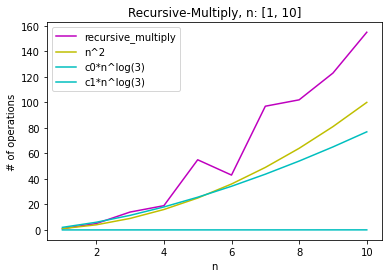

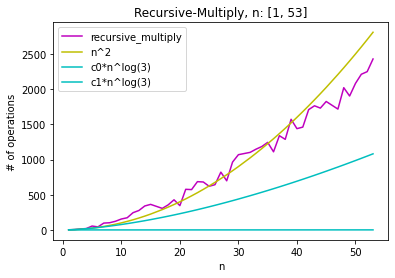

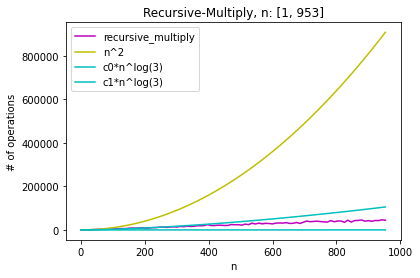

In [8]:

small_numbers = [int(2.1**x) for x in range(0, 10)]
large_numbers = [int(2.1**x) for x in range(0, 50)]
very_large_numbers = [int(2.1**x) for x in range(0, 900, 10)]

c0 = 0.001
c1 = 2

for numbers in [small_numbers, large_numbers, very_large_numbers]:
  axis_n = []
  axis_algo = []
  axis_n2 = []
  axis_c0nlog3 = []
  axis_c1nlog3 = []

  for x in numbers:
    COUNT = 0
    n = len(bin(x)[2:])
    _ = recursive_multiply(x, x)
    axis_n.append(n)
    axis_algo.append(COUNT)
    axis_n2.append(n**2)
    axis_c0nlog3.append(c0*n**log(3, 2))
    axis_c1nlog3.append(c1*n**log(3, 2))

  plt.plot(axis_n, axis_algo, 'm-', label="recursive_multiply")
  plt.plot(axis_n, axis_n2, 'y-', label="n^2")
  plt.plot(axis_n, axis_c0nlog3, 'c-', label="c0*n^log(3)")
  plt.plot(axis_n, axis_c1nlog3, 'c-', label="c1*n^log(3)")
  plt.xlabel("n")
  plt.ylabel("# of operations")
  plt.title(f"Recursive-Multiply, n: [1, {axis_n[-1]}]")
  plt.legend()
  plt.show()
